<a href="https://colab.research.google.com/github/Jannettejg2/JupyterPractice/blob/main/Proyecto_Bedu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print "Introduzca su peso"
peso = input ()
print "Introduzca su altura"
altura = input ()
IMC=peso/altura**2


print "IMC"
print IMC

if IMC<=18.0:
print "Peso demasiado bajo"
elif IMC<=24.9:
print "Su peso es normal felicidades"
elif IMC<=29.9:
print "Tiene sobrepeso, vigile su dieta"
elif IMC>29.9:
print "Obesidad grave, consulte su médico"

SyntaxError: ignored

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime, time, requests
from time import sleep

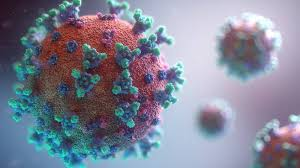

In [ ]:
import matplotlib.pyplot as plt
from IPython.display import Image
Image(filename='20200926.png', width='80%')

In [ ]:
covid_19_data = pd.read_csv('covid_19_data.csv')
covid_19_data['ObservationDate'] = pd.to_datetime(covid_19_data['ObservationDate'])
covid_19_data = covid_19_data.sort_values('ObservationDate', ascending=True)
print('Shape:', covid_19_data.shape)
print('Date min:', np.min(covid_19_data['ObservationDate']), 'Date max:', np.max(covid_19_data['ObservationDate']))
# replace NaN Provinces with string
covid_19_data['Province/State'] = covid_19_data['Province/State'].fillna('No_Province')
covid_19_data.tail()

Shape: (116805, 8)
Date min: 2020-01-22 00:00:00 Date max: 2020-09-23 00:00:00


,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
116312,116313,2020-09-23,Caqueta,Colombia,2020-09-24 04:23:38,7843.0,282.0,6799.0
116313,116314,2020-09-23,Casanare,Colombia,2020-09-24 04:23:38,1972.0,41.0,1356.0
116314,116315,2020-09-23,Castilla - La Mancha,Spain,2020-09-24 04:23:38,38035.0,3080.0,6392.0
116305,116306,2020-09-23,California,US,2020-09-24 04:23:38,796436.0,15291.0,0.0
116804,116805,2020-09-23,Zuid-Holland,Netherlands,2020-09-24 04:23:38,29513.0,1372.0,0.0


In [ ]:
count_nan = len(covid_19_data) - covid_19_data.count()
count_nan

SNo                0
ObservationDate    0
Province/State     0
Country/Region     0
Last Update        0
Confirmed          0
Deaths             0
Recovered          0
dtype: int64

In [ ]:
countries =list(set(covid_19_data['Country/Region']))
print('Unique Country/Regio found:', str(len(countries)))
countries

Unique Country/Regio found: 223


['Romania',
 'Poland',
 'Bahrain',
 'Yemen',
 'Cyprus',
 'Sri Lanka',
 'Greece',
 'Lebanon',
 'Azerbaijan',
 'Guyana',
 'Uruguay',
 'France',
 'Mayotte',
 'Iran',
 'US',
 'Kuwait',
 'Finland',
 'Belgium',
 'Bahamas',
 'Papua New Guinea',
 'Malta',
 'Liberia',
 'South Sudan',
 'Kazakhstan',
 'Somalia',
 'Latvia',
 'Mauritania',
 'Ivory Coast',
 'Iceland',
 'Uzbekistan',
 'Montenegro',
 'Colombia',
 'Belize',
 'Gambia, The',
 'Republic of Ireland',
 'Chad',
 'Barbados',
 'Thailand',
 'Guatemala',
 'Mali',
 'Serbia',
 'Ecuador',
 'Norway',
 'Congo (Brazzaville)',
 'Western Sahara',
 'Macau',
 'Suriname',
 'occupied Palestinian territory',
 'North Ireland',
 'Guinea-Bissau',
 'Jordan',
 'Argentina',
 'Seychelles',
 'Switzerland',
 'Nicaragua',
 'Grenada',
 'Aruba',
 'Denmark',
 'Zimbabwe',
 'Kenya',
 'Reunion',
 'Mauritius',
 'Tunisia',
 'Syria',
 'The Gambia',
 'Niger',
 'Djibouti',
 'Algeria',
 'Indonesia',
 'Curacao',
 'Belarus',
 'Monaco',
 'Slovenia',
 'Haiti',
 'Dominica',
 'Canada',

In [ ]:
zones =list((set(covid_19_data['Province/State'])))
print('Unique Province/State found:', str(len(zones)))

Unique Province/State found: 724


In [ ]:
def get_lat_lon(zone, 
                output_as = 'center'):
    # thanks openstreetmap! 
    # create url
    url = '{0}{1}{2}'.format('http://nominatim.openstreetmap.org/search?q=',
                             zone,
                             '&format=json&polygon=0')
    # send out request
    response = requests.get(url).json()[0]

    # parse response to list
    if output_as == 'boundingbox':
        lst = response[output_as]
        output = [float(i) for i in lst]
    if output_as == 'center':
        lst = [response.get(key) for key in ['lon','lat']]
        output = [float(i) for i in lst]
        
    return output

In [ ]:
geo_centers_lon = []
geo_centers_lat = []
total_ctry = len(countries)
counter_ = 0
for ctry in countries:
    if counter_ % 10 == 0: print(total_ctry - counter_)
    time.sleep(0.2)
    centroid = [None, None]
    try:
        centroid = get_lat_lon(ctry, output_as='center')

    except:
        print('Could not find:', ctry)
        
    geo_centers_lon.append(centroid[0])
    geo_centers_lat.append(centroid[1])
        
     
    counter_ += 1

223
213
203
193
183
Could not find: occupied Palestinian territory
173
163
153
143
133
123
113
103
93
83
73
63
53
43
33
23
13
3


In [ ]:
full_lats = []
full_lons = []
for i, r in covid_19_data.iterrows():
    country = r['Country/Region']
    index_list = countries.index(country)
    full_lats.append(geo_centers_lat[index_list])
    full_lons.append(geo_centers_lon[index_list])
     
# add to data frame
covid_19_data['Longitude'] = full_lons
covid_19_data['Latitude'] = full_lats
covid_19_data.head(5)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Longitude,Latitude
0,1,2020-01-22,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0,72.83357,19.140625
21,22,2020-01-22,Ningxia,Mainland China,1/22/2020 17:00,1.0,0.0,0.0,72.83357,19.140625
22,23,2020-01-22,Qinghai,Mainland China,1/22/2020 17:00,0.0,0.0,0.0,72.83357,19.140625
23,24,2020-01-22,Shaanxi,Mainland China,1/22/2020 17:00,0.0,0.0,0.0,72.83357,19.140625
24,25,2020-01-22,Shandong,Mainland China,1/22/2020 17:00,2.0,0.0,0.0,72.83357,19.140625


In [ ]:
covid_19_data[covid_19_data['Province/State'] == 'Mexico']

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Longitude,Latitude
27034,27035,2020-05-20,Mexico,Mexico,2020-05-21 02:32:48,9346.0,563.0,7365.0,-99.133178,19.43263
27486,27487,2020-05-21,Mexico,Mexico,2020-05-22 02:36:51,9661.0,622.0,7663.0,-99.133178,19.43263
27938,27939,2020-05-22,Mexico,Mexico,2020-05-23 02:32:42,10160.0,809.0,7914.0,-99.133178,19.43263
28390,28391,2020-05-23,Mexico,Mexico,2020-05-24 02:32:43,10606.0,842.0,8289.0,-99.133178,19.43263
28842,28843,2020-05-24,Mexico,Mexico,2020-05-25 02:32:44,11057.0,846.0,8730.0,-99.133178,19.43263
...,...,...,...,...,...,...,...,...,...,...
113562,113563,2020-09-19,Mexico,Mexico,2020-09-20 04:22:56,76784.0,8936.0,64292.0,-99.133178,19.43263
114304,114305,2020-09-20,Mexico,Mexico,2020-09-21 04:23:18,77015.0,8950.0,64731.0,-99.133178,19.43263
115046,115047,2020-09-21,Mexico,Mexico,2020-09-22 04:23:11,77232.0,8964.0,65162.0,-99.133178,19.43263
115789,115790,2020-09-22,Mexico,Mexico,2020-09-23 04:23:40,77823.0,9103.0,65480.0,-99.133178,19.43263


In [ ]:
def plot_world_map(virus_data, date, save_to_file_name = ''):
    # Set the dimension of the figure
    #plt.figure(figsize=(16, 8))
    # Set the dimension of the figure
    my_dpi=96
    plt.figure(figsize=(2600/my_dpi, 1800/my_dpi), dpi=my_dpi)

    # Make the background map
    m=Basemap(llcrnrlon=-180, llcrnrlat=-65,urcrnrlon=180,urcrnrlat=80)
    m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
    m.fillcontinents(color='grey', alpha=0.3)
    m.drawcoastlines(linewidth=0.1, color="white")
    
    total_cases = np.sum(virus_data['Confirmed'])

    # Add a point per position
    m.scatter(virus_data['Longitude'], 
              virus_data['Latitude'], 
              s = virus_data['Confirmed'] * 8, # play around with the size or use np.log if you dont like the big circles
              alpha=0.4, 
              c=virus_data['labels_enc'], 
              cmap="Set1")

    plt.title(str(date) + ' Confirmed Covid-19 Cases: ' + str(int(total_cases)) + '\n(circles not to scale)', fontsize=50)
    
    if save_to_file_name != '':
        plt.savefig(save_to_file_name)
        
    plt.show()
    

In [ ]:
# Create color map
# prepare a color for each point depending on the continent.
covid_19_data['labels_enc'] = pd.factorize(covid_19_data['Country/Region'])[0]
covid_19_data['labels_enc']

0          0
21         0
22         0
23         0
24         0
          ..
116312    15
116313    15
116314    30
116305     3
116804    53
Name: labels_enc, Length: 116805, dtype: int64

In [ ]:
df_group = df.groupby(by='Country_Region').aggregate(np.sum).T

In [ ]:
!pip install Cython

!apt-get update && apt-get install -y gcc

!pip install pyproj

!pip install GEOS

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:4 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Get:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release [564 B]
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:10 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release.gpg [833 B]
Get:11 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:12 htt

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime, time, requests
from time import sleep

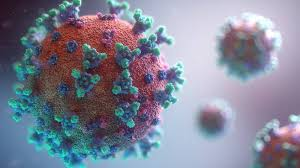

In [ ]:
import matplotlib.pyplot as plt
from IPython.display import Image
Image(filename='20200926.png', width='80%')

In [ ]:
covid_19_data = pd.read_csv('covid_19_data.csv')
covid_19_data['ObservationDate'] = pd.to_datetime(covid_19_data['ObservationDate'])
covid_19_data = covid_19_data.sort_values('ObservationDate', ascending=True)
print('Shape:', covid_19_data.shape)
print('Date min:', np.min(covid_19_data['ObservationDate']), 'Date max:', np.max(covid_19_data['ObservationDate']))
# replace NaN Provinces with string
covid_19_data['Province/State'] = covid_19_data['Province/State'].fillna('No_Province')
covid_19_data.tail()

Shape: (116805, 8)
Date min: 2020-01-22 00:00:00 Date max: 2020-09-23 00:00:00


,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
116312,116313,2020-09-23,Caqueta,Colombia,2020-09-24 04:23:38,7843.0,282.0,6799.0
116313,116314,2020-09-23,Casanare,Colombia,2020-09-24 04:23:38,1972.0,41.0,1356.0
116314,116315,2020-09-23,Castilla - La Mancha,Spain,2020-09-24 04:23:38,38035.0,3080.0,6392.0
116305,116306,2020-09-23,California,US,2020-09-24 04:23:38,796436.0,15291.0,0.0
116804,116805,2020-09-23,Zuid-Holland,Netherlands,2020-09-24 04:23:38,29513.0,1372.0,0.0


In [ ]:
countries =list(set(df['Country_Region']))
print('Unique Country/Regio found:', str(len(countries)))
countries

Unique Country/Regio found: 188


['Portugal',
 'Jamaica',
 'Canada',
 'Egypt',
 'China',
 'Argentina',
 'Oman',
 'Bulgaria',
 'Sao Tome and Principe',
 'Venezuela',
 'Tajikistan',
 'Eritrea',
 'San Marino',
 'Lithuania',
 'Cabo Verde',
 'Burkina Faso',
 'Cuba',
 'Trinidad and Tobago',
 'Cyprus',
 'Serbia',
 'Mongolia',
 'Dominica',
 "Cote d'Ivoire",
 'Yemen',
 'Korea, South',
 'Congo (Brazzaville)',
 'Papua New Guinea',
 'Lebanon',
 'Somalia',
 'New Zealand',
 'Saint Lucia',
 'Vietnam',
 'Japan',
 'Costa Rica',
 'Paraguay',
 'Zambia',
 'Mozambique',
 'Albania',
 'Ukraine',
 'Netherlands',
 'Iraq',
 'Kosovo',
 'Georgia',
 'Togo',
 'Liberia',
 'Monaco',
 'South Africa',
 'Uzbekistan',
 'Nepal',
 'Rwanda',
 'Syria',
 'Eswatini',
 'Ethiopia',
 'United Kingdom',
 'Philippines',
 'Iceland',
 'Sweden',
 'Moldova',
 'Uganda',
 'Saudi Arabia',
 'Finland',
 'Sierra Leone',
 'Benin',
 'Iran',
 'Maldives',
 'Fiji',
 'Armenia',
 'Montenegro',
 'Belarus',
 'Denmark',
 'Peru',
 'Libya',
 'Liechtenstein',
 'Algeria',
 'Slovakia',
 'R

In [ ]:
def get_lat_lon(zone, 
                output_as = 'center'):
    # thanks openstreetmap! 
    # create url
    url = '{0}{1}{2}'.format('http://nominatim.openstreetmap.org/search?q=',
                             zone,
                             '&format=json&polygon=0')
    # send out request
    response = requests.get(url).json()[0]

    # parse response to list
    if output_as == 'boundingbox':
        lst = response[output_as]
        output = [float(i) for i in lst]
    if output_as == 'center':
        lst = [response.get(key) for key in ['lon','lat']]
        output = [float(i) for i in lst]
        
    return output

In [ ]:
geo_centers_lon = []
geo_centers_lat = []
total_ctry = len(countries)
counter_ = 0
for ctry in countries:
    if counter_ % 10 == 0: print(total_ctry - counter_)
    time.sleep(0.2)
    centroid = [None, None]
    try:
        centroid = get_lat_lon(ctry, output_as='center')

    except:
        print('Could not find:', ctry)
        
    geo_centers_lon.append(centroid[0])
    geo_centers_lat.append(centroid[1])
        
     
    counter_ += 1


188
178
168
158
148
138
128
118
108
98
88
78
68
58
48
38
28
18
8


In [ ]:
full_lats = []
full_lons = []
for i, r in df.iterrows():
    country = r['Country_Region']
    index_list = countries.index(country)
    full_lats.append(geo_centers_lat[index_list])
    full_lons.append(geo_centers_lon[index_list])
     
# add to data frame
df['Long_'] = full_lons
df['Lat'] = full_lats
df.head(10)

,FIPS,Admin2,Country_Region,Fecha,Confirmados,Deaths,Recovered,Active,Combined_Key,New Georeferenced Column,US States,New Jersey Counties Cartographic Boundary File,Counties,Long_,Lat,labels_enc
0,90036.0,Unassigned,US,05/14/2020 03:32:28 AM,0,0,0,0,"Unassigned, New York, US",NaN,NaN,NaN,NaN,-100.445882,39.783730,0
1,13075.0,Cook,US,05/14/2020 03:32:28 AM,32,3,0,29,"Cook, Georgia, US",POINT (-83.42947229 31.160684910000004),6.0,NaN,2501.0,-100.445882,39.783730,0
2,NaN,NaN,Denmark,05/14/2020 03:32:28 AM,10667,533,8663,1471,Denmark,POINT (9.5018 56.2639),NaN,NaN,NaN,10.333328,55.670249,1
3,NaN,NaN,Vietnam,05/14/2020 03:32:28 AM,288,0,252,36,Vietnam,POINT (108.277199 14.058324),NaN,NaN,NaN,108.426511,13.290403,2
4,NaN,NaN,France,05/14/2020 03:32:28 AM,6,0,6,0,"Saint Barthelemy, France",POINT (-62.83330000000001 17.9),NaN,NaN,NaN,1.888334,46.603354,3
5,NaN,NaN,Qatar,05/14/2020 03:32:28 AM,26539,14,3143,23382,Qatar,POINT (51.1839 25.3548),NaN,NaN,NaN,51.229529,25.333698,4
6,NaN,NaN,Malaysia,05/14/2020 03:32:28 AM,6779,111,5281,1387,Malaysia,POINT (101.975766 4.210483999999999),NaN,NaN,NaN,102.265682,4.569375,5
7,NaN,NaN,Seychelles,05/14/2020 03:32:28 AM,11,0,10,1,Seychelles,POINT (55.492 -4.6796),NaN,NaN,NaN,55.454015,-4.657498,6
8,NaN,NaN,MS Zaandam,05/14/2020 03:32:28 AM,9,2,0,7,MS Zaandam,NaN,NaN,NaN,NaN,4.818529,52.438770,7
9,19181.0,Warren,US,05/14/2020 03:32:28 AM,52,0,0,52,"Warren, Iowa, US",POINT (-93.56007641000001 41.33559454),14.0,NaN,1524.0,-100.445882,39.783730,0


In [ ]:
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
Suggested packages:
  libgdal-doc
The following NEW packages will be installed:
  libgeos-dev
0 upgraded, 1 newly installed, 0 to remove and 53 not upgraded.
Need to get 73.1 kB of archives.
After this operation, 486 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libgeos-dev amd64 3.6.2-1build2 [73.1 kB]
Fetched 73.1 kB in 0s (175 kB/s)
Selecting previously unselected package libgeos-dev.
(Reading database ... 144676 files and directories currently installed.)
Preparing to unpack .../libgeos-dev_3.6.2-1build2_amd64.deb ...
Unpacking libgeos-dev (3.6.2-1build2) ...
Setting up libgeos-dev (3.6.2-1b

In [ ]:
!pip install pyproj==1.9.6

     |████████████████████████████████| 2.8MB 2.9MB/s 
  Created wheel for pyproj: filename=pyproj-1.9.6-cp36-cp36m-linux_x86_64.whl size=3702130 sha256=e9c78913fdf86e0d6608bd4adc1344f7c17f6d663b7a916955e9a819b660d87c
  Stored in directory: /root/.cache/pip/wheels/02/cd/b1/a2d6430f74c7a778a43d62f78bec109ca69c732dc9b929142a
Successfully built pyproj
  Found existing installation: pyproj 2.6.1.post1
    Uninstalling pyproj-2.6.1.post1:
      Successfully uninstalled pyproj-2.6.1.post1


In [ ]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
pip install numpy

In [ ]:
pip install matplotlib

In [ ]:
pip install Pillow

In [ ]:
def plot_world_map(virus_data, date, save_to_file_name = ''):
    # Set the dimension of the figure
    #plt.figure(figsize=(16, 8))
    # Set the dimension of the figure
    my_dpi=96
    plt.figure(figsize=(2600/my_dpi, 1800/my_dpi), dpi=my_dpi)

    # Make the background map
    m=Basemap(llcrnrlon=-180, llcrnrlat=-65,urcrnrlon=180,urcrnrlat=80)
    m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
    m.fillcontinents(color='grey', alpha=0.3)
    m.drawcoastlines(linewidth=0.1, color="white")
    
    total_cases = np.sum(virus_data['Confirmed'])

    # Add a point per position
    m.scatter(virus_data['Long_'], 
              virus_data['Lat'], 
              s = virus_data['Confirmed'] * 8, # play around with the size or use np.log if you dont like the big circles
              alpha=0.4, 
              c=virus_data['labels_enc'], 
              cmap="Set1")

    plt.title(str(date) + ' Confirmed Covid-19 Cases: ' + str(int(total_cases)) + '\n(circles not to scale)', fontsize=50)
    
    if save_to_file_name != '':
        plt.savefig(save_to_file_name)
        
    plt.show()

In [ ]:
df['labels_enc'] = pd.factorize(df['Country_Region'])[0]
df['labels_enc']

0         0
1         0
2         1
3         2
4         3
       ... 
3234    187
3235      0
3236      0
3237      0
3238      0
Name: labels_enc, Length: 3239, dtype: int64

In [ ]:
def get_lat_lon(zone, 
                output_as = 'center'):
    # thanks openstreetmap! 
    # create url
    url = '{0}{1}{2}'.format('http://nominatim.openstreetmap.org/search?q=',
                             zone,
                             '&format=json&polygon=0')
    # send out request
    response = requests.get(url).json()[0]

    # parse response to list
    if output_as == 'boundingbox':
        lst = response[output_as]
        output = [float(i) for i in lst]
    if output_as == 'center':
        lst = [response.get(key) for key in ['lon','lat']]
        output = [float(i) for i in lst]
        
    return output

In [ ]:
geo_centers_lon = []
geo_centers_lat = []
total_ctry = len(countries)
counter_ = 0
for ctry in countries:
    if counter_ % 10 == 0: print(total_ctry - counter_)
    time.sleep(0.2)
    centroid = [None, None]
    try:
        centroid = get_lat_lon(ctry, output_as='center')

    except:
        print('Could not find:', ctry)
        
    geo_centers_lon.append(centroid[0])
    geo_centers_lat.append(centroid[1])
        
     
    counter_ += 1

188
178
168
158
148
138
128
118
108
98
88
78
68
58
48
38
28
18
8


In [ ]:
# Add geos back to data frame
full_lats = []
full_lons = []
for i, r in covid_19_data.iterrows():
    country = r['Country/Region']
    full_lats.append(geo_centers_lat[index_list])
    full_lons.append(geo_centers_lon[index_list])
     
# add to data frame
covid_19_data['Longitude'] = full_lons
covid_19_data['Latitude'] = full_lats
covid_19_data.head(10)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Longitude,Latitude,labels_enc
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0,-100.445882,39.78373,0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0,-100.445882,39.78373,0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0,-100.445882,39.78373,0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0,-100.445882,39.78373,0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0,-100.445882,39.78373,0
5,6,01/22/2020,Guangdong,Mainland China,1/22/2020 17:00,26.0,0.0,0.0,-100.445882,39.78373,0
6,7,01/22/2020,Guangxi,Mainland China,1/22/2020 17:00,2.0,0.0,0.0,-100.445882,39.78373,0
7,8,01/22/2020,Guizhou,Mainland China,1/22/2020 17:00,1.0,0.0,0.0,-100.445882,39.78373,0
8,9,01/22/2020,Hainan,Mainland China,1/22/2020 17:00,4.0,0.0,0.0,-100.445882,39.78373,0
9,10,01/22/2020,Hebei,Mainland China,1/22/2020 17:00,1.0,0.0,0.0,-100.445882,39.78373,0


In [ ]:
def plot_world_map(virus_data, date, save_to_file_name = ''):
    # Set the dimension of the figure
    #plt.figure(figsize=(16, 8))
    # Set the dimension of the figure
    my_dpi=96
    plt.figure(figsize=(2600/my_dpi, 1800/my_dpi), dpi=my_dpi)

    # Make the background map
    m=Basemap(llcrnrlon=-180, llcrnrlat=-65,urcrnrlon=180,urcrnrlat=80)
    m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
    m.fillcontinents(color='grey', alpha=0.3)
    m.drawcoastlines(linewidth=0.1, color="white")
    
    total_cases = np.sum(virus_data['Confirmed'])

    # Add a point per position
    m.scatter(virus_data['Longitude'], 
              virus_data['Latitude'], 
              s = virus_data['Confirmed'] * 8, # play around with the size or use np.log if you dont like the big circles
              alpha=0.4, 
              c=virus_data['labels_enc'], 
              cmap="Set1")

    plt.title(str(date) + ' Confirmed Covid-19 Cases: ' + str(int(total_cases)) + '\n(circles not to scale)', fontsize=50)
    
    if save_to_file_name != '':
        plt.savefig(save_to_file_name)
        
    plt.show()

In [ ]:
# Create color map
# prepare a color for each point depending on the continent.
covid_19_data['labels_enc'] = pd.factorize(covid_19_data['Country/Region'])[0]
covid_19_data['labels_enc']

0          0
1          0
2          0
3          0
4          0
          ..
116800    82
116801    54
116802     0
116803    82
116804    54
Name: labels_enc, Length: 116805, dtype: int64

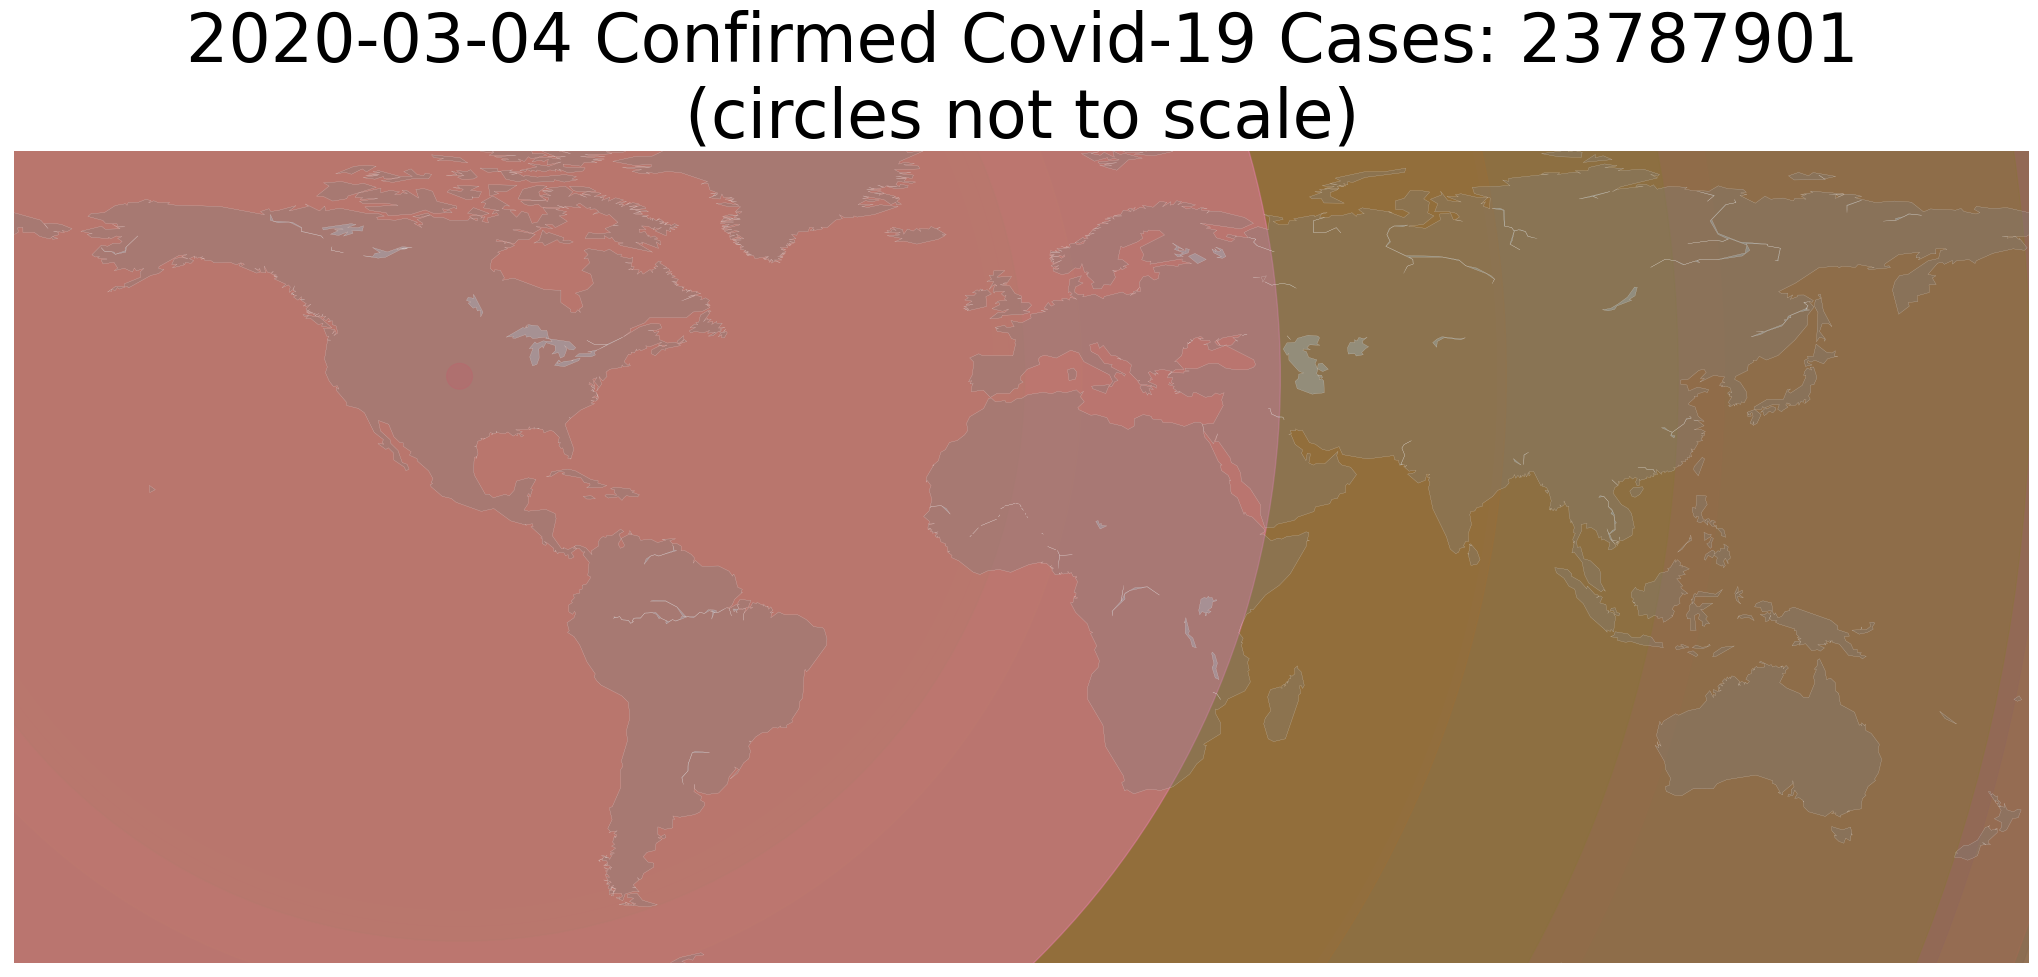

In [ ]:
date = '2020-03-04' 

virus_up_to_today = covid_19_data[covid_19_data['ObservationDate'] <= date]

# simplify data set
virus_up_to_today = virus_up_to_today[['Country/Region','Province/State', 'labels_enc', 'Confirmed',
                     'Deaths', 'Recovered',
                     'Longitude', 'Latitude']]


# get totals by province then by country as these are cumulative values by province first then by country and not all countries have provinces

# group by country and sum/mean values
virus_up_to_today=virus_up_to_today.groupby(['Country/Region', 'Province/State', 'labels_enc']).agg({'Confirmed':'last', 
                           'Deaths':'last',
                           'Recovered':'last',
                           'Longitude':'mean',
                          'Latitude':'mean'}).reset_index()



# group by country and sum/mean values
virus_up_to_today=virus_up_to_today.groupby(['Country/Region', 'labels_enc']).agg({'Confirmed':'sum', 
                           'Deaths':'sum',
                           'Recovered':'sum',
                           'Longitude':'mean',
                          'Latitude':'mean'}).reset_index()

# map out confirmed cases
plot_world_map(virus_up_to_today, str(date)[0:08])

In [ ]:
# build time lapse with accumulator count by country
dates = sorted(list(set(covid_19_data['ObservationDate'])))
dates

['01/22/2020',
 '01/23/2020',
 '01/24/2020',
 '01/25/2020',
 '01/26/2020',
 '01/27/2020',
 '01/28/2020',
 '01/29/2020',
 '01/30/2020',
 '01/31/2020',
 '02/01/2020',
 '02/02/2020',
 '02/03/2020',
 '02/04/2020',
 '02/05/2020',
 '02/06/2020',
 '02/07/2020',
 '02/08/2020',
 '02/09/2020',
 '02/10/2020',
 '02/11/2020',
 '02/12/2020',
 '02/13/2020',
 '02/14/2020',
 '02/15/2020',
 '02/16/2020',
 '02/17/2020',
 '02/18/2020',
 '02/19/2020',
 '02/20/2020',
 '02/21/2020',
 '02/22/2020',
 '02/23/2020',
 '02/24/2020',
 '02/25/2020',
 '02/26/2020',
 '02/27/2020',
 '02/28/2020',
 '02/29/2020',
 '03/01/2020',
 '03/02/2020',
 '03/03/2020',
 '03/04/2020',
 '03/05/2020',
 '03/06/2020',
 '03/07/2020',
 '03/08/2020',
 '03/09/2020',
 '03/10/2020',
 '03/11/2020',
 '03/12/2020',
 '03/13/2020',
 '03/14/2020',
 '03/15/2020',
 '03/16/2020',
 '03/17/2020',
 '03/18/2020',
 '03/19/2020',
 '03/20/2020',
 '03/21/2020',
 '03/22/2020',
 '03/23/2020',
 '03/24/2020',
 '03/25/2020',
 '03/26/2020',
 '03/27/2020',
 '03/28/20

FileNotFoundError: ignored

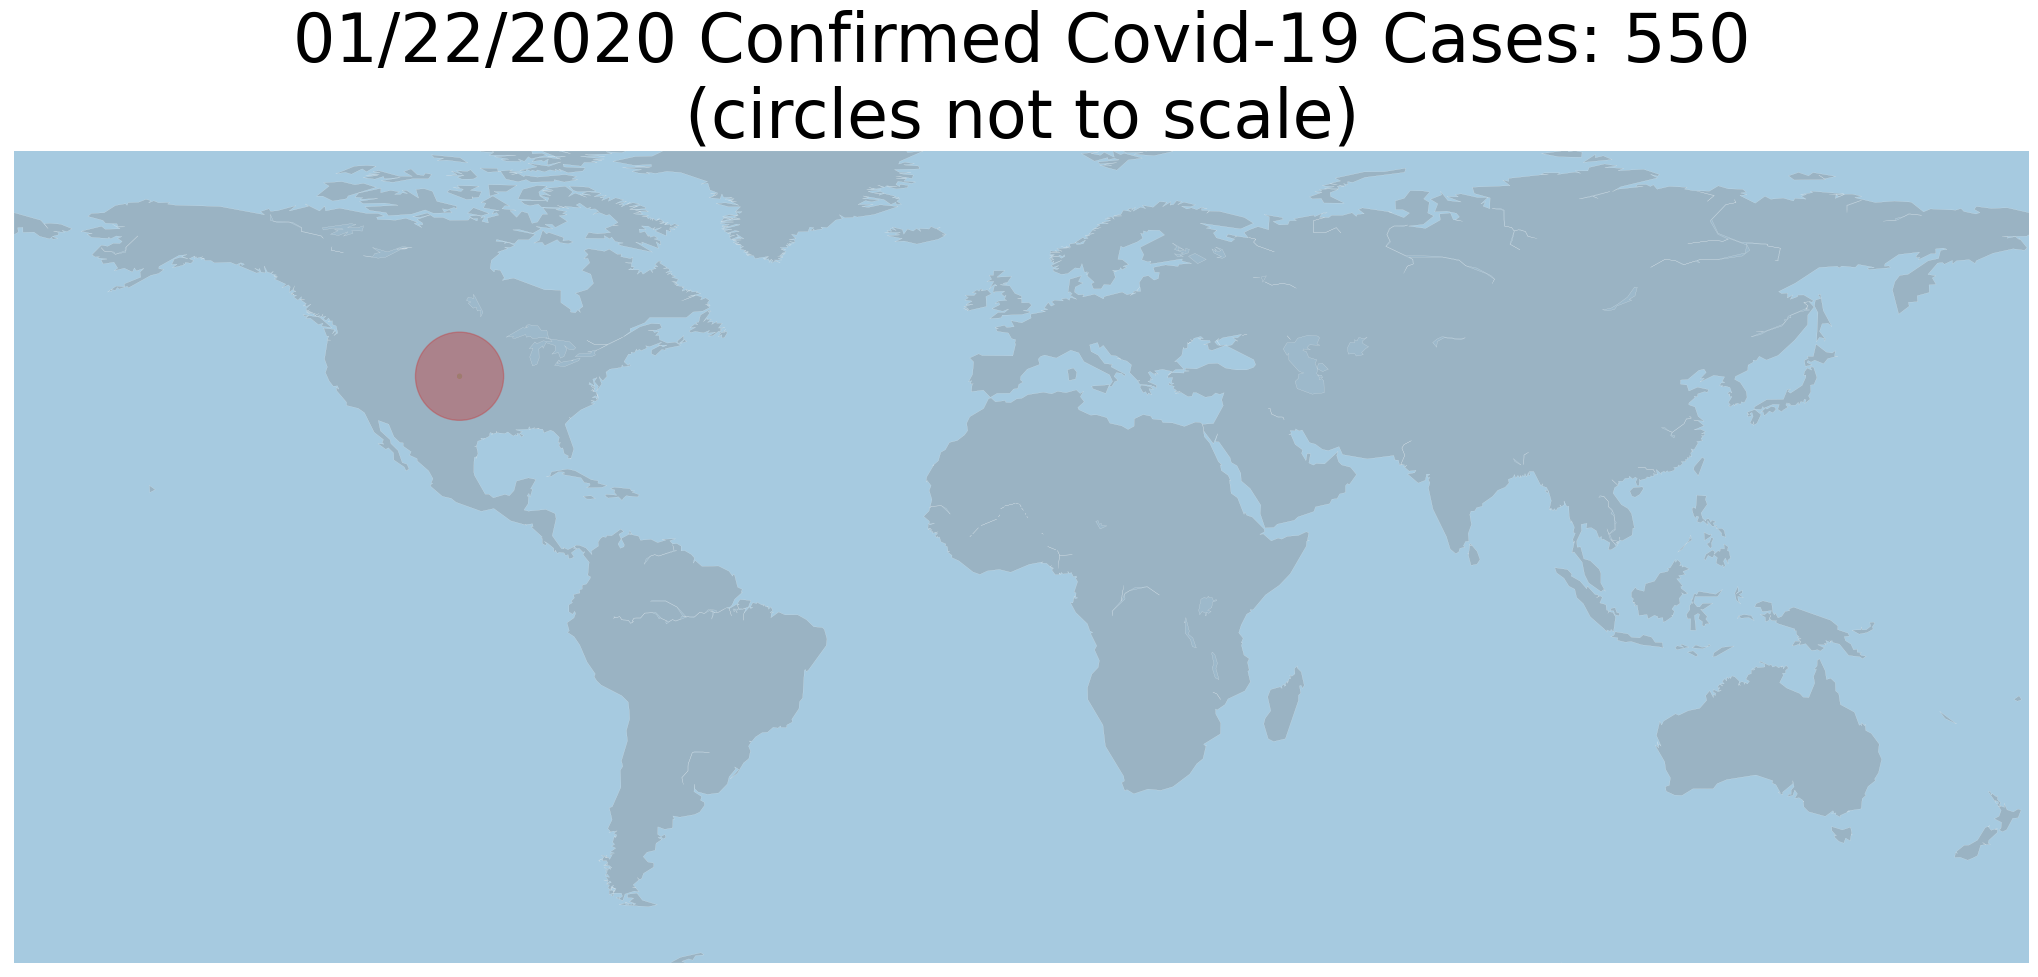

In [ ]:
image_file_name_counter = 0
for date in dates:
    virus_up_to_today = covid_19_data[covid_19_data['ObservationDate'] <= date]
    
    # simplify data set
    virus_up_to_today = virus_up_to_today[['Country/Region','Province/State', 'labels_enc', 'Confirmed',
                         'Deaths', 'Recovered',
                         'Longitude', 'Latitude']]


    # get totals by province then by country as these are cumulative values by province first then by country and not all countries have provinces

    # group by country and sum/mean values
    virus_up_to_today=virus_up_to_today.groupby(['Country/Region', 'Province/State', 'labels_enc']).agg({'Confirmed':'last', 
                               'Deaths':'last',
                               'Recovered':'last',
                               'Longitude':'mean',
                              'Latitude':'mean'}).reset_index()



    # group by country and sum/mean values
    virus_up_to_today=virus_up_to_today.groupby(['Country/Region', 'labels_enc']).agg({'Confirmed':'sum', 
                               'Deaths':'sum',
                               'Recovered':'sum',
                               'Longitude':'mean',
                              'Latitude':'mean'}).reset_index()
     
    # map out confirmed cases
    file_to_save_name = 'movie/anim_' + str(image_file_name_counter) + '.png'
    plot_world_map(virus_up_to_today, str(date)[0:10], file_to_save_name)
    
  
    image_file_name_counter += 1

In [ ]:
$ffmpeg -framerate 10 -i "anim_%d.png" -pix_fmt yuv420p out.mp4

In [ ]:
pip install pandas_alive